# **Packages**

In [1]:
import pandas as pd
from urllib.request import urlopen
from bs4 import BeautifulSoup
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import ttest_ind

import matplotlib as mpl
import matplotlib.pyplot as plt

from google.colab import files
import io

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.neural_network import MLPClassifier

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score

# **Web Scraping**

## **Current Season**

In [2]:
# NBA season we will be analyzing
year2022 = 2022

# per game url... if we want total, then we can switch "per_game" to "totals"
# I think per game would be better for analysis on what we want
url = "https://www.basketball-reference.com/leagues/NBA_{}_per_game.html".format(year2022)
html = urlopen(url)
soup = BeautifulSoup(html)


In [3]:
# get the column headers
# tr is table row
soup.findAll('tr', limit = 2)
# extract the text we need and put into a list
# th is table header
headers = [th.getText() for th in soup.findAll('tr', limit = 2)[0].findAll('th')]
# exclude the first column (it is ranking, but its jsut a random rankning from the website)
headers = headers[1:]
# show the column headers
# headers

In [4]:
# avoid the first header row
rows = soup.findAll('tr')[1:]
player_stats = [[td.getText() for td in rows[i].findAll('td')]
            for i in range(len(rows))]

In [5]:
# put the data into a dataframe
player_stats_22 = pd.DataFrame(player_stats, columns = headers)
player_stats_22['Year'] = 2022
player_stats_22

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Year
0,Precious Achiuwa,C,22,TOR,43,22,23.9,3.2,7.6,.425,0.4,1.2,.302,2.8,6.3,.449,.449,0.9,1.6,.557,2.3,4.9,7.2,1.2,0.5,0.6,1.0,2.0,7.7,2022
1,Steven Adams,C,28,MEM,51,50,26.2,2.6,4.9,.526,0.0,0.0,,2.6,4.9,.526,.526,1.5,2.6,.573,4.4,5.1,9.5,3.1,0.9,0.6,1.6,1.8,6.6,2022
2,Bam Adebayo,C,24,MIA,30,30,32.8,6.8,13.2,.518,0.0,0.1,.000,6.8,13.1,.522,.518,4.6,6.0,.772,2.7,7.3,10.0,3.5,1.6,0.6,3.0,3.2,18.3,2022
3,Santi Aldama,PF,21,MEM,27,0,10.3,1.4,3.6,.381,0.1,1.4,.103,1.2,2.1,.569,.402,0.4,0.7,.600,0.9,1.5,2.4,0.5,0.1,0.3,0.3,1.0,3.3,2022
4,LaMarcus Aldridge,C,36,BRK,36,11,22.9,5.8,10.4,.555,0.3,1.1,.316,5.4,9.3,.582,.571,1.6,1.9,.853,1.5,4.1,5.6,0.9,0.4,1.1,0.9,1.8,13.4,2022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
683,Thaddeus Young,PF,33,SAS,26,1,14.2,2.8,4.9,.578,0.0,0.2,.000,2.8,4.7,.602,.578,0.4,0.8,.455,1.5,2.0,3.6,2.3,0.9,0.3,1.2,1.5,6.1,2022
684,Trae Young,PG,23,ATL,48,48,34.6,9.4,20.6,.454,2.9,7.7,.372,6.5,12.9,.503,.524,6.1,6.9,.894,0.6,3.4,4.0,9.3,1.0,0.1,4.1,1.6,27.7,2022
685,Omer Yurtseven,C,23,MIA,39,10,14.3,2.6,4.9,.523,0.0,0.2,.143,2.6,4.8,.538,.526,0.8,1.3,.640,1.7,4.3,6.0,1.1,0.4,0.5,0.9,1.7,6.0,2022
686,Cody Zeller,C,29,POR,27,0,13.1,1.9,3.3,.567,0.0,0.1,.000,1.9,3.2,.593,.567,1.4,1.8,.776,1.9,2.8,4.6,0.8,0.3,0.2,0.7,2.1,5.2,2022


In [6]:
# add allstar info for these seasons
# player_stats_22['All-Star'] = 0
# player_stats_22

## **2021 Season**

In [7]:
# NBA season we will be analyzing
year2021 = 2021

# per game url... if we want total, then we can switch "per_game" to "totals"
# I think per game would be better for analysis on what we want
url = "https://www.basketball-reference.com/leagues/NBA_{}_per_game.html".format(year2021)
html = urlopen(url)
soup = BeautifulSoup(html)


In [8]:
# get the column headers
# tr is table row
soup.findAll('tr', limit = 2)
# extract the text we need and put into a list
# th is table header
headers = [th.getText() for th in soup.findAll('tr', limit = 2)[0].findAll('th')]
headers = headers[1:]
# show the column headers
# headers

In [9]:
# avoid the first header row
rows = soup.findAll('tr')[1:]
player_stats_1 = [[td.getText() for td in rows[i].findAll('td')]
            for i in range(len(rows))]

In [10]:
# put the data into a dataframe
player_stats_21 = pd.DataFrame(player_stats_1, columns = headers)
player_stats_21
player_stats_21['Year'] = 2021
player_stats_21

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Year
0,Precious Achiuwa,PF,21,MIA,61,4,12.1,2.0,3.7,.544,0.0,0.0,.000,2.0,3.7,.546,.544,0.9,1.8,.509,1.2,2.2,3.4,0.5,0.3,0.5,0.7,1.5,5.0,2021
1,Jaylen Adams,PG,24,MIL,7,0,2.6,0.1,1.1,.125,0.0,0.3,.000,0.1,0.9,.167,.125,0.0,0.0,,0.0,0.4,0.4,0.3,0.0,0.0,0.0,0.1,0.3,2021
2,Steven Adams,C,27,NOP,58,58,27.7,3.3,5.3,.614,0.0,0.1,.000,3.3,5.3,.620,.614,1.0,2.3,.444,3.7,5.2,8.9,1.9,0.9,0.7,1.3,1.9,7.6,2021
3,Bam Adebayo,C,23,MIA,64,64,33.5,7.1,12.5,.570,0.0,0.1,.250,7.1,12.4,.573,.571,4.4,5.5,.799,2.2,6.7,9.0,5.4,1.2,1.0,2.6,2.3,18.7,2021
4,LaMarcus Aldridge,C,35,TOT,26,23,25.9,5.4,11.4,.473,1.2,3.1,.388,4.2,8.3,.505,.525,1.6,1.8,.872,0.7,3.8,4.5,1.9,0.4,1.1,1.0,1.8,13.5,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,Delon Wright,PG,28,SAC,27,8,25.8,3.9,8.3,.462,1.2,3.1,.398,2.6,5.3,.500,.536,1.1,1.3,.833,1.0,2.9,3.9,3.6,1.6,0.4,1.3,1.1,10.0,2021
727,Thaddeus Young,PF,32,CHI,68,23,24.3,5.4,9.7,.559,0.2,0.7,.267,5.3,9.1,.580,.568,1.0,1.7,.628,2.5,3.8,6.2,4.3,1.1,0.6,2.0,2.2,12.1,2021
728,Trae Young,PG,22,ATL,63,63,33.7,7.7,17.7,.438,2.2,6.3,.343,5.6,11.3,.491,.499,7.7,8.7,.886,0.6,3.3,3.9,9.4,0.8,0.2,4.1,1.8,25.3,2021
729,Cody Zeller,C,28,CHO,48,21,20.9,3.8,6.8,.559,0.1,0.6,.143,3.7,6.2,.598,.565,1.8,2.5,.714,2.5,4.4,6.8,1.8,0.6,0.4,1.1,2.5,9.4,2021


In [11]:
# add allstar info for these seasons
player_stats_21['All-Star'] = 0
player_stats_21

player_stats_21.loc[(player_stats_21['Player'] == 'Giannis Antetokounmpo'), 'All-Star'] = 1
player_stats_21.loc[(player_stats_21['Player'] == 'Jaylen Brown'), 'All-Star'] = 1
player_stats_21.loc[(player_stats_21['Player'] == 'Stephen Curry'), 'All-Star'] = 1
player_stats_21.loc[(player_stats_21['Player'] == 'Luka Dončić'), 'All-Star'] = 1
player_stats_21.loc[(player_stats_21['Player'] == 'Paul George'), 'All-Star'] = 1
player_stats_21.loc[(player_stats_21['Player'] == 'Rudy Gobert'), 'All-Star'] = 1
player_stats_21.loc[(player_stats_21['Player'] == 'LeBron James'), 'All-Star'] = 1
player_stats_21.loc[(player_stats_21['Player'] == 'Nikola Jokić'), 'All-Star'] = 1
player_stats_21.loc[(player_stats_21['Player'] == 'Damian Lillard'), 'All-Star'] = 1
player_stats_21.loc[(player_stats_21['Player'] == 'Damian Lillard'), 'All-Star'] = 1
player_stats_21.loc[(player_stats_21['Player'] == 'Chris Paul'), 'All-Star'] = 1
player_stats_21.loc[(player_stats_21['Player'] == 'Domantas Sabonis'), 'All-Star'] = 1
player_stats_21.loc[(player_stats_21['Player'] == 'Ben Simmons'), 'All-Star'] = 1
player_stats_21.loc[(player_stats_21['Player'] == 'Bradley Beal'), 'All-Star'] = 1
player_stats_21.loc[(player_stats_21['Player'] == 'Devin Booker'), 'All-Star'] = 1
player_stats_21.loc[(player_stats_21['Player'] == 'Anthony Davis'), 'All-Star'] = 1
player_stats_21.loc[(player_stats_21['Player'] == 'Kevin Durant'), 'All-Star'] = 1
player_stats_21.loc[(player_stats_21['Player'] == 'Joel Embiid'), 'All-Star'] = 1
player_stats_21.loc[(player_stats_21['Player'] == 'James Harden'), 'All-Star'] = 1
player_stats_21.loc[(player_stats_21['Player'] == 'Kyrie Irving'), 'All-Star'] = 1
player_stats_21.loc[(player_stats_21['Player'] == 'Zach LaVine'), 'All-Star'] = 1
player_stats_21.loc[(player_stats_21['Player'] == 'Kawhi Leonard'), 'All-Star'] = 1
player_stats_21.loc[(player_stats_21['Player'] == 'Donovan Mitchell'), 'All-Star'] = 1
player_stats_21.loc[(player_stats_21['Player'] == 'Julius Randle'), 'All-Star'] = 1
player_stats_21.loc[(player_stats_21['Player'] == 'Jayson Tatum'), 'All-Star'] = 1
player_stats_21.loc[(player_stats_21['Player'] == 'Nikola Vučević'), 'All-Star'] = 1
player_stats_21.loc[(player_stats_21['Player'] == 'Zion Williamson'), 'All-Star'] = 1

## **2020 Season**

In [12]:
# NBA season we will be analyzing
year2020 = 2020

# per game url... if we want total, then we can switch "per_game" to "totals"
# I think per game would be better for analysis on what we want
url = "https://www.basketball-reference.com/leagues/NBA_{}_per_game.html".format(year2020)
html = urlopen(url)
soup = BeautifulSoup(html)


In [13]:
# get the column headers
# tr is table row
soup.findAll('tr', limit = 2)
# extract the text we need and put into a list
# th is table header
headers = [th.getText() for th in soup.findAll('tr', limit = 2)[0].findAll('th')]
# exclude the first column (it is ranking, but its jsut a random rankning from the website)
headers = headers[1:]
# show the column headers
# headers

In [14]:
# avoid the first header row
rows = soup.findAll('tr')[1:]
player_stats_2 = [[td.getText() for td in rows[i].findAll('td')]
            for i in range(len(rows))]

In [15]:
# put the data into a dataframe
player_stats_20 = pd.DataFrame(player_stats_2, columns = headers)
player_stats_20
player_stats_20['Year'] = 2020
player_stats_20

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Year
0,Steven Adams,C,26,OKC,63,63,26.7,4.5,7.6,.592,0.0,0.0,.333,4.5,7.5,.594,.593,1.9,3.2,.582,3.3,6.0,9.3,2.3,0.8,1.1,1.5,1.9,10.9,2020
1,Bam Adebayo,PF,22,MIA,72,72,33.6,6.1,11.0,.557,0.0,0.2,.143,6.1,10.8,.564,.558,3.7,5.3,.691,2.4,7.8,10.2,5.1,1.1,1.3,2.8,2.5,15.9,2020
2,LaMarcus Aldridge,C,34,SAS,53,53,33.1,7.4,15.0,.493,1.2,3.0,.389,6.2,12.0,.519,.532,3.0,3.6,.827,1.9,5.5,7.4,2.4,0.7,1.6,1.4,2.4,18.9,2020
3,Kyle Alexander,C,23,MIA,2,0,6.5,0.5,1.0,.500,0.0,0.0,,0.5,1.0,.500,.500,0.0,0.0,,1.0,0.5,1.5,0.0,0.0,0.0,0.5,0.5,1.0,2020
4,Nickeil Alexander-Walker,SG,21,NOP,47,1,12.6,2.1,5.7,.368,1.0,2.8,.346,1.1,2.8,.391,.455,0.5,0.8,.676,0.2,1.6,1.8,1.9,0.4,0.2,1.1,1.2,5.7,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
672,Trae Young,PG,21,ATL,60,60,35.3,9.1,20.8,.437,3.4,9.5,.361,5.7,11.4,.501,.519,8.0,9.3,.860,0.5,3.7,4.3,9.3,1.1,0.1,4.8,1.7,29.6,2020
673,Cody Zeller,C,27,CHO,58,39,23.1,4.3,8.3,.524,0.3,1.3,.240,4.0,7.0,.577,.543,2.1,3.1,.682,2.8,4.3,7.1,1.5,0.7,0.4,1.3,2.4,11.1,2020
674,Tyler Zeller,C,30,SAS,2,0,2.0,0.5,2.0,.250,0.0,0.0,,0.5,2.0,.250,.250,0.0,0.0,,1.5,0.5,2.0,0.0,0.0,0.0,0.0,0.0,1.0,2020
675,Ante Žižić,C,23,CLE,22,0,10.0,1.9,3.3,.569,0.0,0.0,,1.9,3.3,.569,.569,0.6,0.9,.737,0.8,2.2,3.0,0.3,0.3,0.2,0.5,1.2,4.4,2020


In [16]:
# add allstar info for these seasons
player_stats_20['All-Star'] = 0
player_stats_20

player_stats_20.loc[(player_stats_20['Player'] == 'Anthony Davis'), 'All-Star'] = 1
player_stats_20.loc[(player_stats_20['Player'] == 'Joel Embiid'), 'All-Star'] = 1
player_stats_20.loc[(player_stats_20['Player'] == 'Kawhi Leonard'), 'All-Star'] = 1
player_stats_20.loc[(player_stats_20['Player'] == 'Pascal Siakam'), 'All-Star'] = 1
player_stats_20.loc[(player_stats_20['Player'] == 'Luka Dončić'), 'All-Star'] = 1
player_stats_20.loc[(player_stats_20['Player'] == 'Kemba Walker'), 'All-Star'] = 1
player_stats_20.loc[(player_stats_20['Player'] == 'James Harden'), 'All-Star'] = 1
player_stats_20.loc[(player_stats_20['Player'] == 'Trae Young'), 'All-Star'] = 1
player_stats_20.loc[(player_stats_20['Player'] == 'Khris Middleton'), 'All-Star'] = 1
player_stats_20.loc[(player_stats_20['Player'] == 'Damian Lillard'), 'All-Star'] = 1
player_stats_20.loc[(player_stats_20['Player'] == 'Bam Adebayo'), 'All-Star'] = 1
player_stats_20.loc[(player_stats_20['Player'] == 'Ben Simmons'), 'All-Star'] = 1
player_stats_20.loc[(player_stats_20['Player'] == 'Rudy Gobert'), 'All-Star'] = 1
player_stats_20.loc[(player_stats_20['Player'] == 'Nikola Jokić'), 'All-Star'] = 1
player_stats_20.loc[(player_stats_20['Player'] == 'Jimmy Butler'), 'All-Star'] = 1
player_stats_20.loc[(player_stats_20['Player'] == 'Jayson Tatum'), 'All-Star'] = 1
player_stats_20.loc[(player_stats_20['Player'] == 'Kyle Lowry'), 'All-Star'] = 1
player_stats_20.loc[(player_stats_20['Player'] == 'Chris Paul'), 'All-Star'] = 1
player_stats_20.loc[(player_stats_20['Player'] == 'Brandon Ingram'), 'All-Star'] = 1
player_stats_20.loc[(player_stats_20['Player'] == 'Russell Westbrook'), 'All-Star'] = 1
player_stats_20.loc[(player_stats_20['Player'] == 'Donovan Mitchell'), 'All-Star'] = 1
player_stats_20.loc[(player_stats_20['Player'] == 'Domantas Sabonis'), 'All-Star'] = 1
player_stats_20.loc[(player_stats_20['Player'] == 'LeBron James'), 'All-Star'] = 1
player_stats_20.loc[(player_stats_20['Player'] == 'Giannis Antetokounmpo'), 'All-Star'] = 1

In [17]:
player_stats_20

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Year,All-Star
0,Steven Adams,C,26,OKC,63,63,26.7,4.5,7.6,.592,0.0,0.0,.333,4.5,7.5,.594,.593,1.9,3.2,.582,3.3,6.0,9.3,2.3,0.8,1.1,1.5,1.9,10.9,2020,0
1,Bam Adebayo,PF,22,MIA,72,72,33.6,6.1,11.0,.557,0.0,0.2,.143,6.1,10.8,.564,.558,3.7,5.3,.691,2.4,7.8,10.2,5.1,1.1,1.3,2.8,2.5,15.9,2020,1
2,LaMarcus Aldridge,C,34,SAS,53,53,33.1,7.4,15.0,.493,1.2,3.0,.389,6.2,12.0,.519,.532,3.0,3.6,.827,1.9,5.5,7.4,2.4,0.7,1.6,1.4,2.4,18.9,2020,0
3,Kyle Alexander,C,23,MIA,2,0,6.5,0.5,1.0,.500,0.0,0.0,,0.5,1.0,.500,.500,0.0,0.0,,1.0,0.5,1.5,0.0,0.0,0.0,0.5,0.5,1.0,2020,0
4,Nickeil Alexander-Walker,SG,21,NOP,47,1,12.6,2.1,5.7,.368,1.0,2.8,.346,1.1,2.8,.391,.455,0.5,0.8,.676,0.2,1.6,1.8,1.9,0.4,0.2,1.1,1.2,5.7,2020,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
672,Trae Young,PG,21,ATL,60,60,35.3,9.1,20.8,.437,3.4,9.5,.361,5.7,11.4,.501,.519,8.0,9.3,.860,0.5,3.7,4.3,9.3,1.1,0.1,4.8,1.7,29.6,2020,1
673,Cody Zeller,C,27,CHO,58,39,23.1,4.3,8.3,.524,0.3,1.3,.240,4.0,7.0,.577,.543,2.1,3.1,.682,2.8,4.3,7.1,1.5,0.7,0.4,1.3,2.4,11.1,2020,0
674,Tyler Zeller,C,30,SAS,2,0,2.0,0.5,2.0,.250,0.0,0.0,,0.5,2.0,.250,.250,0.0,0.0,,1.5,0.5,2.0,0.0,0.0,0.0,0.0,0.0,1.0,2020,0
675,Ante Žižić,C,23,CLE,22,0,10.0,1.9,3.3,.569,0.0,0.0,,1.9,3.3,.569,.569,0.6,0.9,.737,0.8,2.2,3.0,0.3,0.3,0.2,0.5,1.2,4.4,2020,0


## **2019 Season**

In [18]:
# NBA season we will be analyzing
year2019 = 2019

# per game url... if we want total, then we can switch "per_game" to "totals"
# I think per game would be better for analysis on what we want
url = "https://www.basketball-reference.com/leagues/NBA_{}_per_game.html".format(year2019)
html = urlopen(url)
soup = BeautifulSoup(html)


In [19]:
# get the column headers
# tr is table row
soup.findAll('tr', limit = 2)
# extract the text we need and put into a list
# th is table header
headers = [th.getText() for th in soup.findAll('tr', limit = 2)[0].findAll('th')]
# exclude the first column (it is ranking, but its jsut a random rankning from the website)
headers = headers[1:]
# show the column headers
# headers

In [20]:
# avoid the first header row
rows = soup.findAll('tr')[1:]
player_stats_3 = [[td.getText() for td in rows[i].findAll('td')]
            for i in range(len(rows))]

In [21]:
# put the data into a dataframe
player_stats_19 = pd.DataFrame(player_stats_3, columns = headers)
player_stats_19
player_stats_19['Year'] = 2019
player_stats_19

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Year
0,Álex Abrines,SG,25,OKC,31,2,19.0,1.8,5.1,.357,1.3,4.1,.323,0.5,1.0,.500,.487,0.4,0.4,.923,0.2,1.4,1.5,0.6,0.5,0.2,0.5,1.7,5.3,2019
1,Quincy Acy,PF,28,PHO,10,0,12.3,0.4,1.8,.222,0.2,1.5,.133,0.2,0.3,.667,.278,0.7,1.0,.700,0.3,2.2,2.5,0.8,0.1,0.4,0.4,2.4,1.7,2019
2,Jaylen Adams,PG,22,ATL,34,1,12.6,1.1,3.2,.345,0.7,2.2,.338,0.4,1.1,.361,.459,0.2,0.3,.778,0.3,1.4,1.8,1.9,0.4,0.1,0.8,1.3,3.2,2019
3,Steven Adams,C,25,OKC,80,80,33.4,6.0,10.1,.595,0.0,0.0,.000,6.0,10.1,.596,.595,1.8,3.7,.500,4.9,4.6,9.5,1.6,1.5,1.0,1.7,2.6,13.9,2019
4,Bam Adebayo,C,21,MIA,82,28,23.3,3.4,5.9,.576,0.0,0.2,.200,3.4,5.7,.588,.579,2.0,2.8,.735,2.0,5.3,7.3,2.2,0.9,0.8,1.5,2.5,8.9,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
729,Tyler Zeller,C,29,MEM,4,1,20.5,4.0,7.0,.571,0.0,0.0,,4.0,7.0,.571,.571,3.5,4.5,.778,2.3,2.3,4.5,0.8,0.3,0.8,1.0,4.0,11.5,2019
730,Ante Žižić,C,22,CLE,59,25,18.3,3.1,5.6,.553,0.0,0.0,,3.1,5.6,.553,.553,1.6,2.2,.705,1.8,3.6,5.4,0.9,0.2,0.4,1.0,1.9,7.8,2019
731,Ivica Zubac,C,21,TOT,59,37,17.6,3.6,6.4,.559,0.0,0.0,,3.6,6.4,.559,.559,1.7,2.1,.802,1.9,4.2,6.1,1.1,0.2,0.9,1.2,2.3,8.9,2019
732,Ivica Zubac,C,21,LAL,33,12,15.6,3.4,5.8,.580,0.0,0.0,,3.4,5.8,.580,.580,1.7,2.0,.864,1.6,3.3,4.9,0.8,0.1,0.8,1.0,2.2,8.5,2019


In [22]:
# add allstar info for these seasons
player_stats_19['All-Star'] = 0
player_stats_19

player_stats_19.loc[(player_stats_19['Player'] == 'Kevin Durant'), 'All-Star'] = 1
player_stats_19.loc[(player_stats_19['Player'] == 'Steph Curry'), 'All-Star'] = 1
player_stats_19.loc[(player_stats_19['Player'] == 'Kyrie Irving'), 'All-Star'] = 1
player_stats_19.loc[(player_stats_19['Player'] == 'Joel Embiid'), 'All-Star'] = 1
player_stats_19.loc[(player_stats_19['Player'] == 'Kawhi Leonard'), 'All-Star'] = 1
player_stats_19.loc[(player_stats_19['Player'] == 'Paul George'), 'All-Star'] = 1
player_stats_19.loc[(player_stats_19['Player'] == 'James Harden'), 'All-Star'] = 1
player_stats_19.loc[(player_stats_19['Player'] == 'Kemba Walker'), 'All-Star'] = 1
player_stats_19.loc[(player_stats_19['Player'] == 'Khris Middleton'), 'All-Star'] = 1
player_stats_19.loc[(player_stats_19['Player'] == 'Anthony Davis'), 'All-Star'] = 1
player_stats_19.loc[(player_stats_19['Player'] == 'Klay Thompson'), 'All-Star'] = 1
player_stats_19.loc[(player_stats_19['Player'] == 'Ben Simmons'), 'All-Star'] = 1
player_stats_19.loc[(player_stats_19['Player'] == 'Damian Lillard'), 'All-Star'] = 1
player_stats_19.loc[(player_stats_19['Player'] == 'Nikola Jokić'), 'All-Star'] = 1
player_stats_19.loc[(player_stats_19['Player'] == 'Blake Griffin'), 'All-Star'] = 1
player_stats_19.loc[(player_stats_19['Player'] == 'Russell Westbrook'), 'All-Star'] = 1
player_stats_19.loc[(player_stats_19['Player'] == "D'Angelo Russell"), 'All-Star'] = 1
player_stats_19.loc[(player_stats_19['Player'] == 'LaMarcus Aldridge'), 'All-Star'] = 1
player_stats_19.loc[(player_stats_19['Player'] == 'Nikola Vučević'), 'All-Star'] = 1
player_stats_19.loc[(player_stats_19['Player'] == 'Karl-Anthony Towns'), 'All-Star'] = 1
player_stats_19.loc[(player_stats_19['Player'] == 'Kyle Lowry'), 'All-Star'] = 1
player_stats_19.loc[(player_stats_19['Player'] == 'Bradley Beal'), 'All-Star'] = 1
player_stats_19.loc[(player_stats_19['Player'] == 'LeBron James'), 'All-Star'] = 1
player_stats_19.loc[(player_stats_19['Player'] == 'Giannis Antetokounmpo'), 'All-Star'] = 1

## **2018 Season**

In [23]:
# NBA season we will be analyzing
year2018 = 2018

# per game url... if we want total, then we can switch "per_game" to "totals"
# I think per game would be better for analysis on what we want
url = "https://www.basketball-reference.com/leagues/NBA_{}_per_game.html".format(year2018)
html = urlopen(url)
soup = BeautifulSoup(html)


In [24]:
# get the column headers
# tr is table row
soup.findAll('tr', limit = 2)
# extract the text we need and put into a list
# th is table header
headers = [th.getText() for th in soup.findAll('tr', limit = 2)[0].findAll('th')]
# exclude the first column (it is ranking, but its jsut a random rankning from the website)
headers = headers[1:]
# show the column headers
# headers

In [25]:
# avoid the first header row
rows = soup.findAll('tr')[1:]
player_stats_4 = [[td.getText() for td in rows[i].findAll('td')]
            for i in range(len(rows))]

In [26]:
# put the data into a dataframe
player_stats_18 = pd.DataFrame(player_stats_4, columns = headers)
player_stats_18
player_stats_18['Year'] = 2018
player_stats_18

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Year
0,Álex Abrines,SG,24,OKC,75,8,15.1,1.5,3.9,.395,1.1,2.9,.380,0.4,0.9,.443,.540,0.5,0.6,.848,0.3,1.2,1.5,0.4,0.5,0.1,0.3,1.7,4.7,2018
1,Quincy Acy,PF,27,BRK,70,8,19.4,1.9,5.2,.356,1.5,4.2,.349,0.4,1.0,.384,.496,0.7,0.9,.817,0.6,3.1,3.7,0.8,0.5,0.4,0.9,2.1,5.9,2018
2,Steven Adams,C,24,OKC,76,76,32.7,5.9,9.4,.629,0.0,0.0,.000,5.9,9.3,.631,.629,2.1,3.8,.559,5.1,4.0,9.0,1.2,1.2,1.0,1.7,2.8,13.9,2018
3,Bam Adebayo,C,20,MIA,69,19,19.8,2.5,4.9,.512,0.0,0.1,.000,2.5,4.8,.523,.512,1.9,2.6,.721,1.7,3.8,5.5,1.5,0.5,0.6,1.0,2.0,6.9,2018
4,Arron Afflalo,SG,32,ORL,53,3,12.9,1.2,3.1,.401,0.5,1.3,.386,0.7,1.7,.413,.485,0.4,0.5,.846,0.1,1.2,1.2,0.6,0.1,0.2,0.4,1.1,3.4,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,Tyler Zeller,C,28,BRK,42,33,16.7,3.0,5.5,.546,0.2,0.6,.385,2.7,4.8,.567,.568,1.0,1.4,.667,1.5,3.1,4.6,0.7,0.2,0.5,0.8,1.9,7.1,2018
686,Tyler Zeller,C,28,MIL,24,1,16.9,2.6,4.4,.590,0.0,0.1,.000,2.6,4.3,.602,.590,0.7,0.8,.895,2.0,2.7,4.6,0.8,0.3,0.6,0.5,2.0,5.9,2018
687,Paul Zipser,SF,23,CHI,54,12,15.3,1.5,4.3,.346,0.7,2.0,.336,0.8,2.3,.355,.425,0.4,0.5,.760,0.2,2.2,2.4,0.9,0.4,0.3,0.8,1.6,4.0,2018
688,Ante Žižić,C,21,CLE,32,2,6.7,1.5,2.1,.731,0.0,0.0,,1.5,2.1,.731,.731,0.7,0.9,.724,0.8,1.1,1.9,0.2,0.1,0.4,0.3,0.9,3.7,2018


In [27]:
# add allstar info for these seasons
player_stats_18['All-Star'] = 0
player_stats_18

player_stats_18.loc[(player_stats_18['Player'] == 'Kyrie Irving'), 'All-Star'] = 1
player_stats_18.loc[(player_stats_18['Player'] == 'DeMar DeRozan'), 'All-Star'] = 1
player_stats_18.loc[(player_stats_18['Player'] == 'LeBron James'), 'All-Star'] = 1
player_stats_18.loc[(player_stats_18['Player'] == 'Giannis Antetokounmpo'), 'All-Star'] = 1
player_stats_18.loc[(player_stats_18['Player'] == 'Joel Embiid'), 'All-Star'] = 1
player_stats_18.loc[(player_stats_18['Player'] == 'Kyle Lowry'), 'All-Star'] = 1
player_stats_18.loc[(player_stats_18['Player'] == 'Bradley Beal'), 'All-Star'] = 1
player_stats_18.loc[(player_stats_18['Player'] == 'John Wall'), 'All-Star'] = 1
player_stats_18.loc[(player_stats_18['Player'] == 'Victor Oladipo'), 'All-Star'] = 1
player_stats_18.loc[(player_stats_18['Player'] == 'Kevin Love'), 'All-Star'] = 1
player_stats_18.loc[(player_stats_18['Player'] == 'Kristaps Porzingis'), 'All-Star'] = 1
player_stats_18.loc[(player_stats_18['Player'] == 'Al Horford'), 'All-Star'] = 1
player_stats_18.loc[(player_stats_18['Player'] == 'Stephen Curry'), 'All-Star'] = 1
player_stats_18.loc[(player_stats_18['Player'] == 'James Harden'), 'All-Star'] = 1
player_stats_18.loc[(player_stats_18['Player'] == 'Kevin Durant'), 'All-Star'] = 1
player_stats_18.loc[(player_stats_18['Player'] == 'Anthony Davis'), 'All-Star'] = 1
player_stats_18.loc[(player_stats_18['Player'] == 'DeMarcus Cousins'), 'All-Star'] = 1
player_stats_18.loc[(player_stats_18['Player'] == 'Damian Lillard'), 'All-Star'] = 1
player_stats_18.loc[(player_stats_18['Player'] == 'Klay Thompson'), 'All-Star'] = 1
player_stats_18.loc[(player_stats_18['Player'] == 'Jimmy Butler'), 'All-Star'] = 1
player_stats_18.loc[(player_stats_18['Player'] == 'Russell Westbrook'), 'All-Star'] = 1
player_stats_18.loc[(player_stats_18['Player'] == 'LaMarcus Aldridge'), 'All-Star'] = 1
player_stats_18.loc[(player_stats_18['Player'] == 'Draymond Green'), 'All-Star'] = 1
player_stats_18.loc[(player_stats_18['Player'] == 'Karl-Anthony Towns'), 'All-Star'] = 1

## **2017 Season**

In [28]:
# NBA season we will be analyzing
year2017 = 2017

# per game url... if we want total, then we can switch "per_game" to "totals"
# I think per game would be better for analysis on what we want
url = "https://www.basketball-reference.com/leagues/NBA_{}_per_game.html".format(year2017)
html = urlopen(url)
soup = BeautifulSoup(html)


In [29]:
# get the column headers
# tr is table row
soup.findAll('tr', limit = 2)
# extract the text we need and put into a list
# th is table header
headers = [th.getText() for th in soup.findAll('tr', limit = 2)[0].findAll('th')]
# exclude the first column (it is ranking, but its jsut a random rankning from the website)
headers = headers[1:]
# show the column headers
# headers

In [30]:
# avoid the first header row
rows = soup.findAll('tr')[1:]
player_stats_5 = [[td.getText() for td in rows[i].findAll('td')]
            for i in range(len(rows))]

In [31]:
# put the data into a dataframe
player_stats_17 = pd.DataFrame(player_stats_5, columns = headers)
player_stats_17
player_stats_17['Year'] = 2017
player_stats_17

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Year
0,Álex Abrines,SG,23,OKC,68,6,15.5,2.0,5.0,.393,1.4,3.6,.381,0.6,1.4,.426,.531,0.6,0.7,.898,0.3,1.0,1.3,0.6,0.5,0.1,0.5,1.7,6.0,2017
1,Quincy Acy,PF,26,TOT,38,1,14.7,1.8,4.5,.412,1.0,2.4,.411,0.9,2.1,.413,.521,1.2,1.6,.750,0.5,2.5,3.0,0.5,0.4,0.4,0.6,1.8,5.8,2017
2,Quincy Acy,PF,26,DAL,6,0,8.0,0.8,2.8,.294,0.2,1.2,.143,0.7,1.7,.400,.324,0.3,0.5,.667,0.3,1.0,1.3,0.0,0.0,0.0,0.3,1.5,2.2,2017
3,Quincy Acy,PF,26,BRK,32,1,15.9,2.0,4.8,.425,1.1,2.6,.434,0.9,2.2,.414,.542,1.3,1.8,.754,0.6,2.8,3.3,0.6,0.4,0.5,0.6,1.8,6.5,2017
4,Steven Adams,C,23,OKC,80,80,29.9,4.7,8.2,.571,0.0,0.0,.000,4.7,8.2,.572,.571,2.0,3.2,.611,3.5,4.2,7.7,1.1,1.1,1.0,1.8,2.4,11.3,2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
614,Cody Zeller,C,24,CHO,62,58,27.8,4.1,7.1,.571,0.0,0.0,.000,4.1,7.1,.572,.571,2.1,3.2,.679,2.2,4.4,6.5,1.6,1.0,0.9,1.0,3.0,10.3,2017
615,Tyler Zeller,C,27,BOS,51,5,10.3,1.5,3.1,.494,0.0,0.0,.000,1.5,3.1,.497,.494,0.4,0.8,.564,0.8,1.6,2.4,0.8,0.1,0.4,0.4,1.2,3.5,2017
616,Stephen Zimmerman,C,20,ORL,19,0,5.7,0.5,1.6,.323,0.0,0.0,,0.5,1.6,.323,.323,0.2,0.3,.600,0.6,1.3,1.8,0.2,0.1,0.3,0.2,0.9,1.2,2017
617,Paul Zipser,SF,22,CHI,44,18,19.2,2.0,5.0,.398,0.8,2.3,.333,1.3,2.8,.451,.473,0.7,0.9,.775,0.3,2.5,2.8,0.8,0.3,0.4,0.9,1.8,5.5,2017


In [32]:
# add allstar info for these seasons
player_stats_17['All-Star'] = 0
player_stats_17

player_stats_17.loc[(player_stats_17['Player'] == 'Kyrie Irving'), 'All-Star'] = 1
player_stats_17.loc[(player_stats_17['Player'] == 'DeMar DeRozan'), 'All-Star'] = 1
player_stats_17.loc[(player_stats_17['Player'] == 'LeBron James'), 'All-Star'] = 1
player_stats_17.loc[(player_stats_17['Player'] == 'Giannis Antetokounmpo'), 'All-Star'] = 1
player_stats_17.loc[(player_stats_17['Player'] == 'Jimmy Butler'), 'All-Star'] = 1
player_stats_17.loc[(player_stats_17['Player'] == 'Isaiah Thomas'), 'All-Star'] = 1
player_stats_17.loc[(player_stats_17['Player'] == 'John Wall'), 'All-Star'] = 1
player_stats_17.loc[(player_stats_17['Player'] == 'Carmelo Anthony'), 'All-Star'] = 1
player_stats_17.loc[(player_stats_17['Player'] == 'Kyle Lowry'), 'All-Star'] = 1
player_stats_17.loc[(player_stats_17['Player'] == 'Paul George'), 'All-Star'] = 1
player_stats_17.loc[(player_stats_17['Player'] == 'Kemba Walker'), 'All-Star'] = 1
player_stats_17.loc[(player_stats_17['Player'] == 'Paul Millsap'), 'All-Star'] = 1
player_stats_17.loc[(player_stats_17['Player'] == 'Stephen Curry'), 'All-Star'] = 1
player_stats_17.loc[(player_stats_17['Player'] == 'James Harden'), 'All-Star'] = 1
player_stats_17.loc[(player_stats_17['Player'] == 'Kevin Durant'), 'All-Star'] = 1
player_stats_17.loc[(player_stats_17['Player'] == 'Kawhi Leonard'), 'All-Star'] = 1
player_stats_17.loc[(player_stats_17['Player'] == 'Anthony Davis'), 'All-Star'] = 1
player_stats_17.loc[(player_stats_17['Player'] == 'Russell Westbrook'), 'All-Star'] = 1
player_stats_17.loc[(player_stats_17['Player'] == 'Klay Thompson'), 'All-Star'] = 1
player_stats_17.loc[(player_stats_17['Player'] == 'Draymond Green'), 'All-Star'] = 1
player_stats_17.loc[(player_stats_17['Player'] == 'DeMarcus Cousins'), 'All-Star'] = 1
player_stats_17.loc[(player_stats_17['Player'] == 'Marc Gasol'), 'All-Star'] = 1
player_stats_17.loc[(player_stats_17['Player'] == 'DeAndre Jordan'), 'All-Star'] = 1
player_stats_17.loc[(player_stats_17['Player'] == 'Gordon Hayward'), 'All-Star'] = 1

## **2016 Season**

In [33]:
# NBA season we will be analyzing
year2016 = 2016

# per game url... if we want total, then we can switch "per_game" to "totals"
# I think per game would be better for analysis on what we want
url = "https://www.basketball-reference.com/leagues/NBA_{}_per_game.html".format(year2016)
html = urlopen(url)
soup = BeautifulSoup(html)


In [34]:
# get the column headers
# tr is table row
soup.findAll('tr', limit = 2)
# extract the text we need and put into a list
# th is table header
headers = [th.getText() for th in soup.findAll('tr', limit = 2)[0].findAll('th')]
# exclude the first column (it is ranking, but its jsut a random rankning from the website)
headers = headers[1:]
# show the column headers
# headers

In [35]:
# avoid the first header row
rows = soup.findAll('tr')[1:]
player_stats_6 = [[td.getText() for td in rows[i].findAll('td')]
            for i in range(len(rows))]

In [36]:
# put the data into a dataframe
player_stats_16 = pd.DataFrame(player_stats_6, columns = headers)
player_stats_16
player_stats_16['Year'] = 2016
player_stats_16

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Year
0,Quincy Acy,PF,25,SAC,59,29,14.8,2.0,3.6,.556,0.3,0.8,.388,1.7,2.8,.606,.600,0.8,1.2,.735,1.1,2.1,3.2,0.5,0.5,0.4,0.5,1.7,5.2,2016
1,Jordan Adams,SG,21,MEM,2,0,7.5,1.0,3.0,.333,0.0,0.5,.000,1.0,2.5,.400,.333,1.5,2.5,.600,0.0,1.0,1.0,1.5,1.5,0.0,1.0,1.0,3.5,2016
2,Steven Adams,C,22,OKC,80,80,25.2,3.3,5.3,.613,0.0,0.0,,3.3,5.3,.613,.613,1.4,2.5,.582,2.7,3.9,6.7,0.8,0.5,1.1,1.1,2.8,8.0,2016
3,Arron Afflalo,SG,30,NYK,71,57,33.4,5.0,11.3,.443,1.3,3.4,.382,3.7,7.9,.469,.500,1.5,1.8,.840,0.3,3.4,3.7,2.0,0.4,0.1,1.2,2.0,12.8,2016
4,Alexis Ajinça,C,27,NOP,59,17,14.6,2.5,5.3,.476,0.0,0.0,.000,2.5,5.3,.478,.476,0.9,1.1,.839,1.3,3.3,4.6,0.5,0.3,0.6,0.9,2.3,6.0,2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
596,Joe Young,PG,23,IND,41,0,9.4,1.5,4.1,.367,0.2,1.1,.217,1.3,3.0,.423,.396,0.5,0.6,.800,0.1,1.1,1.2,1.6,0.4,0.0,0.8,0.7,3.8,2016
597,Nick Young,SG,30,LAL,54,2,19.1,2.3,6.9,.339,1.4,4.4,.325,0.9,2.5,.363,.442,1.2,1.4,.829,0.3,1.5,1.8,0.6,0.4,0.1,0.6,0.9,7.3,2016
598,Thaddeus Young,PF,27,BRK,73,73,33.0,6.8,13.2,.514,0.1,0.4,.233,6.7,12.8,.523,.518,1.4,2.2,.644,2.4,6.6,9.0,1.9,1.5,0.5,1.9,2.5,15.1,2016
599,Cody Zeller,C,23,CHO,73,60,24.3,3.2,6.0,.529,0.0,0.1,.100,3.2,5.8,.539,.530,2.4,3.2,.754,1.9,4.3,6.2,1.0,0.8,0.9,0.9,2.8,8.7,2016


In [37]:
# add allstar info for these seasons
player_stats_16['All-Star'] = 0
player_stats_16

player_stats_16.loc[(player_stats_16['Player'] == 'Kyle Lowry'), 'All-Star'] = 1
player_stats_16.loc[(player_stats_16['Player'] == 'Dwyane Wade'), 'All-Star'] = 1
player_stats_16.loc[(player_stats_16['Player'] == 'LeBron James'), 'All-Star'] = 1
player_stats_16.loc[(player_stats_16['Player'] == 'Paul George'), 'All-Star'] = 1
player_stats_16.loc[(player_stats_16['Player'] == 'Carmelo Anthony'), 'All-Star'] = 1
player_stats_16.loc[(player_stats_16['Player'] == 'Jimmy Butler'), 'All-Star'] = 1
player_stats_16.loc[(player_stats_16['Player'] == 'DeMar DeRozan'), 'All-Star'] = 1
player_stats_16.loc[(player_stats_16['Player'] == 'John Wall'), 'All-Star'] = 1
player_stats_16.loc[(player_stats_16['Player'] == 'Isaiah Thomas'), 'All-Star'] = 1
player_stats_16.loc[(player_stats_16['Player'] == 'Chris Bosh'), 'All-Star'] = 1
player_stats_16.loc[(player_stats_16['Player'] == 'Paul Millsap'), 'All-Star'] = 1
player_stats_16.loc[(player_stats_16['Player'] == 'Andre Drummond'), 'All-Star'] = 1
player_stats_16.loc[(player_stats_16['Player'] == 'Stephen Curry'), 'All-Star'] = 1
player_stats_16.loc[(player_stats_16['Player'] == 'Kobe Bryant'), 'All-Star'] = 1
player_stats_16.loc[(player_stats_16['Player'] == 'Kevin Durant'), 'All-Star'] = 1
player_stats_16.loc[(player_stats_16['Player'] == 'Kawhi Leonard'), 'All-Star'] = 1
player_stats_16.loc[(player_stats_16['Player'] == 'Chris Paul'), 'All-Star'] = 1
player_stats_16.loc[(player_stats_16['Player'] == 'Chris Paul'), 'All-Star'] = 1
player_stats_16.loc[(player_stats_16['Player'] == 'James Harden'), 'All-Star'] = 1
player_stats_16.loc[(player_stats_16['Player'] == 'Klay Thompson'), 'All-Star'] = 1
player_stats_16.loc[(player_stats_16['Player'] == 'LaMarcus Aldridge'), 'All-Star'] = 1
player_stats_16.loc[(player_stats_16['Player'] == 'DeMarcus Cousins'), 'All-Star'] = 1
player_stats_16.loc[(player_stats_16['Player'] == 'Anthony Davis'), 'All-Star'] = 1
player_stats_16.loc[(player_stats_16['Player'] == 'Draymond Green'), 'All-Star'] = 1

## **Combine Seasons**

In [38]:
frames = [player_stats_16, player_stats_17, player_stats_18, player_stats_19, 
          player_stats_20, player_stats_21]
results = pd.concat(frames)
results

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Year,All-Star
0,Quincy Acy,PF,25,SAC,59,29,14.8,2.0,3.6,.556,0.3,0.8,.388,1.7,2.8,.606,.600,0.8,1.2,.735,1.1,2.1,3.2,0.5,0.5,0.4,0.5,1.7,5.2,2016,0
1,Jordan Adams,SG,21,MEM,2,0,7.5,1.0,3.0,.333,0.0,0.5,.000,1.0,2.5,.400,.333,1.5,2.5,.600,0.0,1.0,1.0,1.5,1.5,0.0,1.0,1.0,3.5,2016,0
2,Steven Adams,C,22,OKC,80,80,25.2,3.3,5.3,.613,0.0,0.0,,3.3,5.3,.613,.613,1.4,2.5,.582,2.7,3.9,6.7,0.8,0.5,1.1,1.1,2.8,8.0,2016,0
3,Arron Afflalo,SG,30,NYK,71,57,33.4,5.0,11.3,.443,1.3,3.4,.382,3.7,7.9,.469,.500,1.5,1.8,.840,0.3,3.4,3.7,2.0,0.4,0.1,1.2,2.0,12.8,2016,0
4,Alexis Ajinça,C,27,NOP,59,17,14.6,2.5,5.3,.476,0.0,0.0,.000,2.5,5.3,.478,.476,0.9,1.1,.839,1.3,3.3,4.6,0.5,0.3,0.6,0.9,2.3,6.0,2016,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,Delon Wright,PG,28,SAC,27,8,25.8,3.9,8.3,.462,1.2,3.1,.398,2.6,5.3,.500,.536,1.1,1.3,.833,1.0,2.9,3.9,3.6,1.6,0.4,1.3,1.1,10.0,2021,0
727,Thaddeus Young,PF,32,CHI,68,23,24.3,5.4,9.7,.559,0.2,0.7,.267,5.3,9.1,.580,.568,1.0,1.7,.628,2.5,3.8,6.2,4.3,1.1,0.6,2.0,2.2,12.1,2021,0
728,Trae Young,PG,22,ATL,63,63,33.7,7.7,17.7,.438,2.2,6.3,.343,5.6,11.3,.491,.499,7.7,8.7,.886,0.6,3.3,3.9,9.4,0.8,0.2,4.1,1.8,25.3,2021,0
729,Cody Zeller,C,28,CHO,48,21,20.9,3.8,6.8,.559,0.1,0.6,.143,3.7,6.2,.598,.565,1.8,2.5,.714,2.5,4.4,6.8,1.8,0.6,0.4,1.1,2.5,9.4,2021,0


In [39]:
# change areas with nothing to 0 so that we can later turn the column into float
results["FG%"] = results["FG%"].str.replace('', '0')
results["3P%"] = results["3P%"].str.replace('', '0')
results["2P%"] = results["2P%"].str.replace('', '0')
results["eFG%"] = results["eFG%"].str.replace('', '0')
results["FT%"] = results["FT%"].str.replace('', '0')

In [40]:
results = results.astype({'Age': float, 'G': float, 
                            'GS': float, 'MP': float, 
                            'FG': float, 'FGA': float, 
                            'FG%': float, '3P': float, 
                            '3PA': float, '3P%': float, 
                            '2P': float, '2PA': float, 
                            '2P%': float, 'eFG%': float, 
                            'FT': float, 'FTA': float, 
                            'FT%': float, 'ORB': float, 
                            'DRB': float, 'TRB': float, 
                            'AST': float, 'STL': float, 
                            'BLK': float, 'TOV': float, 
                            'PF': float, 'PTS': float,
                            'Pos': str, 'Tm': str,
                            'Player': str})
results = results.drop('Age', axis = 1)

In [41]:
results.dtypes

Player       object
Pos          object
Tm           object
G           float64
GS          float64
MP          float64
FG          float64
FGA         float64
FG%         float64
3P          float64
3PA         float64
3P%         float64
2P          float64
2PA         float64
2P%         float64
eFG%        float64
FT          float64
FTA         float64
FT%         float64
ORB         float64
DRB         float64
TRB         float64
AST         float64
STL         float64
BLK         float64
TOV         float64
PF          float64
PTS         float64
Year          int64
All-Star      int64
dtype: object

In [42]:
# Check point
ids = results.Player.str.contains('Luka')
results[ids]

,Player,Pos,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Year,All-Star
188,Luka Dončić,SG,DAL,72.0,72.0,32.2,7.0,16.5,0.040207,2.3,7.1,0.030207,4.7,9.3,0.050003,0.040907,4.8,6.7,0.070103,1.2,6.6,7.8,6.0,1.1,0.3,3.4,1.9,21.2,2019,0
183,Luka Dončić,PG,DAL,61.0,61.0,33.6,9.5,20.6,0.040603,2.8,8.9,0.030106,6.7,11.7,0.050704,0.050301,7.0,9.2,0.070508,1.3,8.1,9.4,8.8,1.0,0.2,4.3,2.5,28.8,2020,1
556,Luka Šamanić,PF,SAS,3.0,1.0,16.0,1.7,5.3,0.030103,1.0,2.7,0.030705,0.7,2.7,0.020500,0.040006,1.0,1.3,0.070500,0.3,3.0,3.3,2.0,0.0,0.7,0.7,2.0,5.3,2020,0
177,Luka Dončić,PG,DAL,66.0,66.0,34.3,9.8,20.5,0.040709,2.9,8.3,0.030500,6.9,12.2,0.050607,0.050500,5.2,7.1,0.070300,0.8,7.2,8.0,8.6,1.0,0.5,4.3,2.3,27.7,2021,1
600,Luka Šamanić,PF,SAS,33.0,4.0,9.3,1.4,3.2,0.040408,0.4,1.3,0.020709,1.1,1.9,0.050605,0.050005,0.5,0.9,0.050502,0.5,1.6,2.1,0.5,0.2,0.2,0.6,1.3,3.7,2021,0


In [43]:
# results = results.groupby('Player').agg('mean')

In [44]:
results = results.round(2)
results

,Player,Pos,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Year,All-Star
0,Quincy Acy,PF,SAC,59.0,29.0,14.8,2.0,3.6,0.05,0.3,0.8,0.03,1.7,2.8,0.06,0.06,0.8,1.2,0.07,1.1,2.1,3.2,0.5,0.5,0.4,0.5,1.7,5.2,2016,0
1,Jordan Adams,SG,MEM,2.0,0.0,7.5,1.0,3.0,0.03,0.0,0.5,0.00,1.0,2.5,0.04,0.03,1.5,2.5,0.06,0.0,1.0,1.0,1.5,1.5,0.0,1.0,1.0,3.5,2016,0
2,Steven Adams,C,OKC,80.0,80.0,25.2,3.3,5.3,0.06,0.0,0.0,0.00,3.3,5.3,0.06,0.06,1.4,2.5,0.05,2.7,3.9,6.7,0.8,0.5,1.1,1.1,2.8,8.0,2016,0
3,Arron Afflalo,SG,NYK,71.0,57.0,33.4,5.0,11.3,0.04,1.3,3.4,0.03,3.7,7.9,0.04,0.05,1.5,1.8,0.08,0.3,3.4,3.7,2.0,0.4,0.1,1.2,2.0,12.8,2016,0
4,Alexis Ajinça,C,NOP,59.0,17.0,14.6,2.5,5.3,0.04,0.0,0.0,0.00,2.5,5.3,0.04,0.04,0.9,1.1,0.08,1.3,3.3,4.6,0.5,0.3,0.6,0.9,2.3,6.0,2016,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,Delon Wright,PG,SAC,27.0,8.0,25.8,3.9,8.3,0.04,1.2,3.1,0.03,2.6,5.3,0.05,0.05,1.1,1.3,0.08,1.0,2.9,3.9,3.6,1.6,0.4,1.3,1.1,10.0,2021,0
727,Thaddeus Young,PF,CHI,68.0,23.0,24.3,5.4,9.7,0.05,0.2,0.7,0.02,5.3,9.1,0.05,0.05,1.0,1.7,0.06,2.5,3.8,6.2,4.3,1.1,0.6,2.0,2.2,12.1,2021,0
728,Trae Young,PG,ATL,63.0,63.0,33.7,7.7,17.7,0.04,2.2,6.3,0.03,5.6,11.3,0.04,0.04,7.7,8.7,0.08,0.6,3.3,3.9,9.4,0.8,0.2,4.1,1.8,25.3,2021,0
729,Cody Zeller,C,CHO,48.0,21.0,20.9,3.8,6.8,0.05,0.1,0.6,0.01,3.7,6.2,0.05,0.05,1.8,2.5,0.07,2.5,4.4,6.8,1.8,0.6,0.4,1.1,2.5,9.4,2021,0


In [45]:
# Check point
ids2 = results.Player.str.contains('Trae')
results[ids2]

,Player,Pos,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Year,All-Star
725,Trae Young,PG,ATL,81.0,81.0,30.9,6.5,15.5,0.04,1.9,6.0,0.03,4.6,9.6,0.04,0.04,4.2,5.1,0.08,0.8,2.9,3.7,8.1,0.9,0.2,3.8,1.7,19.1,2019,0
672,Trae Young,PG,ATL,60.0,60.0,35.3,9.1,20.8,0.04,3.4,9.5,0.03,5.7,11.4,0.05,0.05,8.0,9.3,0.08,0.5,3.7,4.3,9.3,1.1,0.1,4.8,1.7,29.6,2020,1
728,Trae Young,PG,ATL,63.0,63.0,33.7,7.7,17.7,0.04,2.2,6.3,0.03,5.6,11.3,0.04,0.04,7.7,8.7,0.08,0.6,3.3,3.9,9.4,0.8,0.2,4.1,1.8,25.3,2021,0


# **Models**

In [46]:
results = results[['Player', 'Pos', 'Tm', 'G', 'GS', 'MP', 'FG', 'FGA', 'FG%', 
                   '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 
                   'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 
                   'PTS', 'All-Star', 'Year'] 
]

xcols = results.columns[3:28].to_list()
print(xcols,'\n')

['G', 'GS', 'MP', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS'] 



In [47]:
results.fillna(0, inplace=True)

In [48]:
# Split the data into training and testing

X_train, X_test, y_train, y_test = train_test_split(results[xcols], 
                                                    results['All-Star'], 
                                                    train_size = 0.8, 
                                                    random_state = 1)
print('training data:', X_train.shape)
print('test data:', X_test.shape)

training data: (3241, 25)
test data: (811, 25)


In [49]:
log_reg = LogisticRegression(solver = 'lbfgs', max_iter = 3000)

# Fit the model to the training data
clf = log_reg.fit(X_train, y_train)

print('training accuracy: {}'.format(clf.score(X_train, y_train).round(3)))
print('test accuracy: {}'.format(clf.score(X_test, y_test).round(3)))

training accuracy: 0.981
test accuracy: 0.988


In [50]:
# Put the coefficients into a new dataframe
coef = pd.concat([pd.DataFrame(xcols), pd.DataFrame(np.transpose(clf.coef_))], 
                 axis = 1)
coef.columns = ['feature','coefficient']
coef.sort_values(by = ['coefficient'], ascending = False, inplace = True)


print('Ten largest positive features:\n', coef.head(10), '\n')
print('Ten largest negative features:\n', coef.tail(10))

Ten largest positive features:
    feature  coefficient
20     STL     1.183500
21     BLK     0.704305
17     DRB     0.606696
24     PTS     0.578619
6       3P     0.567076
3       FG     0.480799
19     AST     0.331224
1       GS     0.176415
14     FTA     0.172218
11     2P%     0.019987 

Ten largest negative features:
    feature  coefficient
10     2PA    -0.089607
8      3P%    -0.107201
0        G    -0.122533
13      FT    -0.208419
4      FGA    -0.209624
9       2P    -0.312378
7      3PA    -0.484989
22     TOV    -0.495160
23      PF    -0.585004
16     ORB    -0.730517


In [51]:
# Adding the features with the 5 largest positive and negative coefficients

xcols2 = coef.feature[0:5].to_list()
xcols2 += coef.feature[-5:].to_list()
print(xcols2)

['STL', 'BLK', 'DRB', 'PTS', '3P', '2P', '3PA', 'TOV', 'PF', 'ORB']


In [52]:
X_train, X_test, y_train, y_test = train_test_split(results[xcols2], 
                                                    results['All-Star'], 
                                                    train_size = 0.8, 
                                                    random_state = 1)
print('training data:', X_train.shape)
print('test data:', X_test.shape)

# fit the model to the training data
clf2 = log_reg.fit(X_train, y_train)

# get accuracy stats
print('training accuracy: {}'.format(clf2.score(X_train, y_train).round(3)))
print('test accuracy: {}'.format(clf2.score(X_test, y_test).round(3)))

training data: (3241, 10)
test data: (811, 10)
training accuracy: 0.981
test accuracy: 0.98


In [53]:
# Regularization

cset = [.001, .01, .1, 1, 10]
for i in cset:
    print('C =', i)
    log_reg = LogisticRegression(solver = 'lbfgs', 
                                 max_iter = 3000, 
                                 C = i)
    clf = log_reg.fit(X_train, y_train)
    print('training accuracy: {}'.format(clf.score(X_train, 
                                                   y_train).round(3)))
    print('test accuracy: {}'.format(clf.score(X_test, 
                                               y_test).round(3)), 
          '\n')

C = 0.001
training accuracy: 0.977
test accuracy: 0.972 

C = 0.01
training accuracy: 0.98
test accuracy: 0.982 

C = 0.1
training accuracy: 0.982
test accuracy: 0.982 

C = 1
training accuracy: 0.981
test accuracy: 0.98 

C = 10
training accuracy: 0.98
test accuracy: 0.98 



In [54]:
# Cross-validation w/ tuning regularization in logistic regression

for i in cset:
    print('C =', i)
    log_reg = LogisticRegression(solver = 'lbfgs', 
                                 max_iter = 3000, 
                                 C = i)
    scores = cross_val_score(log_reg, 
                             results[xcols2], 
                             results['All-Star'], 
                             cv = 5)
    print(scores)
    print("Accuracy: %0.3f (+/- %0.3f)" % (scores.mean(), 
                                           scores.std() * 2), 
          '\n')

C = 0.001
[0.97657213 0.97533909 0.97777778 0.97530864 0.98765432]
Accuracy: 0.979 (+/- 0.009) 

C = 0.01
[0.97903822 0.97657213 0.98024691 0.98148148 0.98641975]
Accuracy: 0.981 (+/- 0.007) 

C = 0.1
[0.98027127 0.97657213 0.98024691 0.97901235 0.98641975]
Accuracy: 0.981 (+/- 0.006) 

C = 1
[0.98273736 0.97903822 0.97530864 0.97777778 0.98518519]
Accuracy: 0.980 (+/- 0.007) 

C = 10
[0.98273736 0.97780518 0.97530864 0.97901235 0.98395062]
Accuracy: 0.980 (+/- 0.006) 



In [55]:
y_pred_test = clf.predict(X_test)
print('Recall: {:.3f}'.format(recall_score(y_test, y_pred_test)))
print('Precision: {:.3f}'.format(precision_score(y_test, y_pred_test)))
print('F1 score: {:.3f}'.format(f1_score(y_test, y_pred_test)))
cm = confusion_matrix(y_test, y_pred_test)
tn, fp, fn, tp = cm.ravel()
specificity = tn / (tn + fp)
print('Specificity: {:.3f}'.format(specificity))

Recall: 0.562
Precision: 0.900
F1 score: 0.692
Specificity: 0.997


In [56]:
# Confusion matrix

cm = confusion_matrix(y_test, y_pred_test)
sample = np.array([['TN', 'FP'], ['FN', 'TP']])
print('CM key:\n', sample, '\n')
print('CM for test:\n', cm)

CM key:
 [['TN' 'FP']
 ['FN' 'TP']] 

CM for test:
 [[777   2]
 [ 14  18]]


In [57]:
scaler = MinMaxScaler()

X = results[xcols2]
scaled_X = scaler.fit_transform(X)
y = results['All-Star']

In [58]:
scaled_X = scaler.fit_transform(X_train)

tuned_parameters = {'C': [0.1, 0.5, 1, 5, 10, 50, 100]}

grid = GridSearchCV(LogisticRegression(solver = 'liblinear'), 
                    tuned_parameters, 
                    cv = 3, 
                    scoring = 'accuracy')

grid.fit(scaled_X, y_train)

print('mean of accuracies:', grid.cv_results_['mean_test_score'])
print('std dev of accuracies:', grid.cv_results_['std_test_score'])

print('best parameters:', grid.best_params_) 

best_logreg = grid.best_estimator_

mean of accuracies: [0.96451731 0.97439157 0.97593335 0.97963563 0.98056098 0.98086962
 0.98117826]
std dev of accuracies: [0.00042074 0.00313888 0.00302408 0.00200302 0.00262276 0.00286516
 0.00243302]
best parameters: {'C': 100}


# **Predicting**

In [59]:
player_stats_22

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Year
0,Precious Achiuwa,C,22,TOR,43,22,23.9,3.2,7.6,.425,0.4,1.2,.302,2.8,6.3,.449,.449,0.9,1.6,.557,2.3,4.9,7.2,1.2,0.5,0.6,1.0,2.0,7.7,2022
1,Steven Adams,C,28,MEM,51,50,26.2,2.6,4.9,.526,0.0,0.0,,2.6,4.9,.526,.526,1.5,2.6,.573,4.4,5.1,9.5,3.1,0.9,0.6,1.6,1.8,6.6,2022
2,Bam Adebayo,C,24,MIA,30,30,32.8,6.8,13.2,.518,0.0,0.1,.000,6.8,13.1,.522,.518,4.6,6.0,.772,2.7,7.3,10.0,3.5,1.6,0.6,3.0,3.2,18.3,2022
3,Santi Aldama,PF,21,MEM,27,0,10.3,1.4,3.6,.381,0.1,1.4,.103,1.2,2.1,.569,.402,0.4,0.7,.600,0.9,1.5,2.4,0.5,0.1,0.3,0.3,1.0,3.3,2022
4,LaMarcus Aldridge,C,36,BRK,36,11,22.9,5.8,10.4,.555,0.3,1.1,.316,5.4,9.3,.582,.571,1.6,1.9,.853,1.5,4.1,5.6,0.9,0.4,1.1,0.9,1.8,13.4,2022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
683,Thaddeus Young,PF,33,SAS,26,1,14.2,2.8,4.9,.578,0.0,0.2,.000,2.8,4.7,.602,.578,0.4,0.8,.455,1.5,2.0,3.6,2.3,0.9,0.3,1.2,1.5,6.1,2022
684,Trae Young,PG,23,ATL,48,48,34.6,9.4,20.6,.454,2.9,7.7,.372,6.5,12.9,.503,.524,6.1,6.9,.894,0.6,3.4,4.0,9.3,1.0,0.1,4.1,1.6,27.7,2022
685,Omer Yurtseven,C,23,MIA,39,10,14.3,2.6,4.9,.523,0.0,0.2,.143,2.6,4.8,.538,.526,0.8,1.3,.640,1.7,4.3,6.0,1.1,0.4,0.5,0.9,1.7,6.0,2022
686,Cody Zeller,C,29,POR,27,0,13.1,1.9,3.3,.567,0.0,0.1,.000,1.9,3.2,.593,.567,1.4,1.8,.776,1.9,2.8,4.6,0.8,0.3,0.2,0.7,2.1,5.2,2022


In [60]:
player_stats_22.fillna(0, inplace = True)

In [61]:
# only take the important stats we found earlier

player_stats_22_short = player_stats_22[['STL', 'BLK', 'DRB', 'PTS', '3P', 
                                         '2P', '3PA', 'TOV', 'PF', 'ORB']]

In [62]:
player_stats_22_short

,STL,BLK,DRB,PTS,3P,2P,3PA,TOV,PF,ORB
0,0.5,0.6,4.9,7.7,0.4,2.8,1.2,1.0,2.0,2.3
1,0.9,0.6,5.1,6.6,0.0,2.6,0.0,1.6,1.8,4.4
2,1.6,0.6,7.3,18.3,0.0,6.8,0.1,3.0,3.2,2.7
3,0.1,0.3,1.5,3.3,0.1,1.2,1.4,0.3,1.0,0.9
4,0.4,1.1,4.1,13.4,0.3,5.4,1.1,0.9,1.8,1.5
...,...,...,...,...,...,...,...,...,...,...
683,0.9,0.3,2.0,6.1,0.0,2.8,0.2,1.2,1.5,1.5
684,1.0,0.1,3.4,27.7,2.9,6.5,7.7,4.1,1.6,0.6
685,0.4,0.5,4.3,6.0,0.0,2.6,0.2,0.9,1.7,1.7
686,0.3,0.2,2.8,5.2,0.0,1.9,0.1,0.7,2.1,1.9


In [63]:
xcols3 = player_stats_22_short.columns.to_list()
print(xcols3,'\n')

['STL', 'BLK', 'DRB', 'PTS', '3P', '2P', '3PA', 'TOV', 'PF', 'ORB'] 



In [64]:
pred = clf.predict(player_stats_22[xcols3])

In [65]:
print(pred)

[0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1
 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 

In [66]:
player_stats_22['All-Star'] = pred.tolist()

In [67]:
player_stats_22

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Year,All-Star
0,Precious Achiuwa,C,22,TOR,43,22,23.9,3.2,7.6,.425,0.4,1.2,.302,2.8,6.3,.449,.449,0.9,1.6,.557,2.3,4.9,7.2,1.2,0.5,0.6,1.0,2.0,7.7,2022,0
1,Steven Adams,C,28,MEM,51,50,26.2,2.6,4.9,.526,0.0,0.0,,2.6,4.9,.526,.526,1.5,2.6,.573,4.4,5.1,9.5,3.1,0.9,0.6,1.6,1.8,6.6,2022,0
2,Bam Adebayo,C,24,MIA,30,30,32.8,6.8,13.2,.518,0.0,0.1,.000,6.8,13.1,.522,.518,4.6,6.0,.772,2.7,7.3,10.0,3.5,1.6,0.6,3.0,3.2,18.3,2022,0
3,Santi Aldama,PF,21,MEM,27,0,10.3,1.4,3.6,.381,0.1,1.4,.103,1.2,2.1,.569,.402,0.4,0.7,.600,0.9,1.5,2.4,0.5,0.1,0.3,0.3,1.0,3.3,2022,0
4,LaMarcus Aldridge,C,36,BRK,36,11,22.9,5.8,10.4,.555,0.3,1.1,.316,5.4,9.3,.582,.571,1.6,1.9,.853,1.5,4.1,5.6,0.9,0.4,1.1,0.9,1.8,13.4,2022,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
683,Thaddeus Young,PF,33,SAS,26,1,14.2,2.8,4.9,.578,0.0,0.2,.000,2.8,4.7,.602,.578,0.4,0.8,.455,1.5,2.0,3.6,2.3,0.9,0.3,1.2,1.5,6.1,2022,0
684,Trae Young,PG,23,ATL,48,48,34.6,9.4,20.6,.454,2.9,7.7,.372,6.5,12.9,.503,.524,6.1,6.9,.894,0.6,3.4,4.0,9.3,1.0,0.1,4.1,1.6,27.7,2022,1
685,Omer Yurtseven,C,23,MIA,39,10,14.3,2.6,4.9,.523,0.0,0.2,.143,2.6,4.8,.538,.526,0.8,1.3,.640,1.7,4.3,6.0,1.1,0.4,0.5,0.9,1.7,6.0,2022,0
686,Cody Zeller,C,29,POR,27,0,13.1,1.9,3.3,.567,0.0,0.1,.000,1.9,3.2,.593,.567,1.4,1.8,.776,1.9,2.8,4.6,0.8,0.3,0.2,0.7,2.1,5.2,2022,0


In [68]:
# see the predictions
player_stats_22.loc[player_stats_22['All-Star'] == 1]

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Year,All-Star
13,Giannis Antetokounmpo,PF,27,MIL,45,45,32.5,9.9,18.4,.536,1.2,3.9,.295,8.7,14.5,.601,.568,8.0,11.0,.725,1.8,9.4,11.2,5.9,1.0,1.4,3.4,3.2,28.9,2022,1
95,Jimmy Butler,SF,32,MIA,36,36,33.8,7.2,14.7,.491,0.4,1.8,.212,6.8,12.9,.531,.505,6.9,7.8,.890,1.9,4.3,6.2,6.2,1.8,0.4,2.1,1.4,21.8,2022,1
139,Stephen Curry,PG,33,GSW,49,49,34.8,8.3,19.7,.422,4.8,12.5,.381,3.6,7.2,.493,.543,4.3,4.7,.913,0.6,4.8,5.4,6.4,1.5,0.4,3.3,2.0,25.7,2022,1
140,Anthony Davis,C,28,LAL,33,33,35.4,9.5,17.9,.529,0.3,1.9,.175,9.2,16.0,.571,.538,4.4,6.1,.726,2.9,7.2,10.2,2.8,1.3,2.2,2.2,2.6,23.7,2022,1
147,DeMar DeRozan,PF,32,CHI,50,50,35.4,9.9,19.6,.506,0.6,1.8,.326,9.3,17.7,.525,.521,6.8,7.9,.863,0.9,4.3,5.2,5.1,0.9,0.3,2.3,2.2,27.2,2022,1
154,Luka Dončić,PG,22,DAL,39,39,35.2,9.4,21.1,.444,2.4,7.9,.309,6.9,13.2,.524,.502,4.8,6.5,.737,0.9,8.0,8.9,9.1,1.2,0.4,4.3,2.3,26.0,2022,1
169,Kevin Durant,PF,33,BRK,36,36,36.5,10.5,20.3,.520,1.9,5.0,.372,8.7,15.3,.568,.566,6.3,7.1,.894,0.6,6.9,7.4,5.8,0.8,0.9,3.0,1.9,29.3,2022,1
176,Joel Embiid,C,27,PHI,41,41,33.0,9.5,19.1,.497,1.3,3.5,.364,8.2,15.7,.526,.530,9.0,11.1,.809,2.0,8.9,10.9,4.4,1.0,1.5,2.9,2.6,29.3,2022,1
212,Paul George,SF,31,LAC,26,26,35.5,9.0,21.4,.421,2.7,8.3,.323,6.3,13.0,.484,.484,4.0,4.5,.880,0.4,6.7,7.1,5.5,2.0,0.4,4.2,2.5,24.7,2022,1
218,Rudy Gobert,C,29,UTA,42,42,32.5,5.6,8.0,.707,0.0,0.0,.000,5.6,7.9,.712,.707,4.7,6.8,.690,3.7,11.4,15.1,1.2,0.8,2.3,1.8,2.7,16.0,2022,1


In [69]:
predictions_2022 = player_stats_22.loc[player_stats_22['All-Star'] == 1]

In [70]:
predictions_2022 = predictions_2022.astype({'Age': float, 'G': float, 
                            'GS': float, 'MP': float, 
                            'FG': float, 'FGA': float, 
                            'FG%': float, '3P': float, 
                            '3PA': float, '3P%': float, 
                            '2P': float, '2PA': float, 
                            '2P%': float, 'eFG%': float, 
                            'FT': float, 'FTA': float, 
                            'FT%': float, 'ORB': float, 
                            'DRB': float, 'TRB': float, 
                            'AST': float, 'STL': float, 
                            'BLK': float, 'TOV': float, 
                            'PF': float, 'PTS': float,
                            'Pos': str, 'Tm': str,
                            'Player': str})

In [71]:
pred_22_stats = predictions_2022.describe().round(2)
pred_22_stats

,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Year,All-Star
count,18.00,18.00,18.00,18.00,18.00,18.00,18.00,18.00,18.00,18.00,18.00,18.00,18.00,18.00,18.00,18.00,18.00,18.00,18.00,18.00,18.00,18.00,18.00,18.00,18.00,18.00,18.0,18.0
mean,28.22,42.11,42.11,34.68,8.97,18.46,0.49,1.87,5.43,0.31,7.11,13.03,0.55,0.54,5.41,6.65,0.82,1.41,6.86,8.26,6.16,1.26,0.82,3.16,2.21,25.23,2022.0,1.0
std,4.40,6.62,6.62,1.44,1.38,3.21,0.07,1.20,3.15,0.10,1.64,2.80,0.06,0.06,1.67,2.08,0.07,0.94,2.30,3.03,2.37,0.42,0.64,0.83,0.48,3.54,0.0,0.0
min,22.00,26.00,26.00,32.50,5.60,8.00,0.41,0.00,0.00,0.00,3.60,7.20,0.48,0.48,2.00,2.70,0.69,0.30,3.40,4.00,1.20,0.60,0.10,1.80,1.40,16.00,2022.0,1.0
25%,25.25,37.50,37.50,33.42,8.43,17.90,0.45,1.22,3.60,0.31,6.22,12.52,0.50,0.50,4.40,5.58,0.74,0.68,4.65,5.98,4.58,1.00,0.40,2.55,1.92,23.95,2022.0,1.0
50%,27.50,43.00,43.00,34.70,9.40,19.35,0.49,1.75,4.75,0.33,6.85,13.05,0.53,0.53,4.90,6.50,0.83,1.15,6.95,7.90,6.05,1.25,0.55,3.05,2.25,25.80,2022.0,1.0
75%,32.00,47.00,47.00,35.48,9.90,20.52,0.52,2.77,7.85,0.37,8.38,15.10,0.57,0.57,6.68,7.62,0.88,1.87,7.82,9.88,7.65,1.48,1.05,3.58,2.58,27.58,2022.0,1.0
max,37.00,51.00,51.00,37.00,11.00,21.40,0.71,4.80,12.50,0.40,9.30,17.70,0.71,0.71,9.00,11.10,0.91,3.70,11.40,15.10,10.20,2.10,2.30,4.80,3.20,29.30,2022.0,1.0


In [72]:
mean_list = predictions_2022.mean()
mean_df = pd.DataFrame(mean_list)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


In [73]:
mean_df = mean_df.T

In [74]:
mean_df

,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Year,All-Star
0,28.222222,42.111111,42.111111,34.677778,8.972222,18.455556,0.494444,1.872222,5.427778,0.31,7.111111,13.027778,0.547,0.542444,5.411111,6.65,0.816,1.405556,6.861111,8.261111,6.155556,1.255556,0.816667,3.155556,2.211111,25.233333,2022.0,1.0


## **Compare Player to Mean All-Star**

In [75]:
specific_player = player_stats_22.loc[player_stats_22['Player'] == 'Jarrett Allen']
specific_player = specific_player.drop(['Player', 'Pos', 'Tm'], axis = 1)
specific_player

,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Year,All-Star
7,23,46,46,32.6,6.6,9.9,.667,0.0,0.2,.100,6.6,9.7,.680,.669,3.0,4.4,.685,3.6,7.5,11.1,1.8,0.8,1.4,1.8,1.8,16.2,2022,0


In [76]:
specific_player = specific_player.astype({'Age': float, 'G': float, 
                            'GS': float, 'MP': float, 
                            'FG': float, 'FGA': float, 
                            'FG%': float, '3P': float, 
                            '3PA': float, '3P%': float, 
                            '2P': float, '2PA': float, 
                            '2P%': float, 'eFG%': float, 
                            'FT': float, 'FTA': float, 
                            'FT%': float, 'ORB': float, 
                            'DRB': float, 'TRB': float, 
                            'AST': float, 'STL': float, 
                            'BLK': float, 'TOV': float, 
                            'PF': float, 'PTS': float})

In [77]:
list_of_means = mean_df.values.tolist()
list_of_specific_player = specific_player.values.tolist()

In [78]:
array1 = np.array(list_of_specific_player)
array2 = np.array(list_of_means)

In [79]:
subtracted_array = np.subtract(array1, array2)
subtracted = list(subtracted_array)
subtracted

[array([-5.22222222,  3.88888889,  3.88888889, -2.07777778, -2.37222222,
        -8.55555556,  0.17255556, -1.87222222, -5.22777778, -0.21      ,
        -0.51111111, -3.32777778,  0.133     ,  0.12655556, -2.41111111,
        -2.25      , -0.131     ,  2.19444444,  0.63888889,  2.83888889,
        -4.35555556, -0.45555556,  0.58333333, -1.35555556, -0.41111111,
        -9.03333333,  0.        , -1.        ])]

In [80]:
compare = pd.DataFrame(subtracted, columns = ['Age', 'G', 'GS', 'MP', 'FG', 
                                              'FGA', 'FG%', '3P', '3PA', '3P%', 
                                              '2P',	'2PA', '2P%', 'eFG%', 'FT', 
                                              'FTA', 'FT%', 'ORB', 'DRB', 'TRB',
                                              'AST', 'STL', 'BLK', 'TOV', 'PF', 
                                              'PTS', 'Year', 'All-Star'])

We want to see postive numbers for player to be better than average all-star. Except TOV and PF

In [81]:
compare

,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Year,All-Star
0,-5.222222,3.888889,3.888889,-2.077778,-2.372222,-8.555556,0.172556,-1.872222,-5.227778,-0.21,-0.511111,-3.327778,0.133,0.126556,-2.411111,-2.25,-0.131,2.194444,0.638889,2.838889,-4.355556,-0.455556,0.583333,-1.355556,-0.411111,-9.033333,0.0,-1.0


## **All-Star Radar Charts Per Game**



### **Data Setup**

In [82]:
# pick key categories
categories = ['PTS', 'TRB', 'STL', 'BLK', 'AST', 'PF']

In [83]:
select_data = player_stats_22[['Player', 'Tm'] + categories]
select_data.head()

,Player,Tm,PTS,TRB,STL,BLK,AST,PF
0,Precious Achiuwa,TOR,7.7,7.2,0.5,0.6,1.2,2.0
1,Steven Adams,MEM,6.6,9.5,0.9,0.6,3.1,1.8
2,Bam Adebayo,MIA,18.3,10.0,1.6,0.6,3.5,3.2
3,Santi Aldama,MEM,3.3,2.4,0.1,0.3,0.5,1.0
4,LaMarcus Aldridge,BRK,13.4,5.6,0.4,1.1,0.9,1.8


In [84]:
# Convert data to numerical values
for i in categories:
  select_data[i] = pd.to_numeric(player_stats_22[i])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [85]:
# Create columns with percentile rank
for i in categories:
  select_data[i + '_Rank'] = select_data[i].rank(pct = True)

# flip PF becasue low is good
select_data['PF_Rank'] = 1 - select_data['PF_Rank']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [86]:
select_data

,Player,Tm,PTS,TRB,STL,BLK,AST,PF,PTS_Rank,TRB_Rank,STL_Rank,BLK_Rank,AST_Rank,PF_Rank
0,Precious Achiuwa,TOR,7.7,7.2,0.5,0.6,1.2,2.0,0.628634,0.926599,0.515988,0.827762,0.550872,0.289971
1,Steven Adams,MEM,6.6,9.5,0.9,0.6,3.1,1.8,0.558866,0.974564,0.787064,0.827762,0.849564,0.372093
2,Bam Adebayo,MIA,18.3,10.0,1.6,0.6,3.5,3.2,0.925145,0.979651,0.970203,0.827762,0.867006,0.012355
3,Santi Aldama,MEM,3.3,2.4,0.1,0.3,0.5,1.0,0.319041,0.451308,0.201308,0.569767,0.280523,0.689680
4,LaMarcus Aldridge,BRK,13.4,5.6,0.4,1.1,0.9,1.8,0.841570,0.864099,0.426599,0.953488,0.420058,0.372093
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
683,Thaddeus Young,SAS,6.1,3.6,0.9,0.3,2.3,1.5,0.520349,0.652616,0.787064,0.569767,0.768169,0.487645
684,Trae Young,ATL,27.7,4.0,1.0,0.1,9.3,1.6,0.992733,0.704215,0.846657,0.312500,0.997093,0.450581
685,Omer Yurtseven,MIA,6.0,6.0,0.4,0.5,1.1,1.7,0.510901,0.893895,0.426599,0.768169,0.518169,0.411337
686,Cody Zeller,POR,5.2,4.6,0.3,0.2,0.8,2.1,0.457849,0.784884,0.337209,0.438953,0.387355,0.252907


In [87]:
select_data.loc[select_data['Player'] == 'Stephen Curry']

,Player,Tm,PTS,TRB,STL,BLK,AST,PF,PTS_Rank,TRB_Rank,STL_Rank,BLK_Rank,AST_Rank,PF_Rank
139,Stephen Curry,GSW,25.7,5.4,1.5,0.4,6.4,2.0,0.984738,0.849564,0.960756,0.682413,0.96875,0.289971


In [88]:
specific_player_rank = select_data.loc[select_data['Player'] == 'Tyrese Haliburton']
specific_player_rank

,Player,Tm,PTS,TRB,STL,BLK,AST,PF,PTS_Rank,TRB_Rank,STL_Rank,BLK_Rank,AST_Rank,PF_Rank
238,Tyrese Haliburton,SAC,14.3,3.9,1.7,0.7,7.4,1.4,0.856105,0.6875,0.978198,0.866279,0.984738,0.524709


### **Mean Rank** 

**For overall analysis and grading**

In [89]:
select_data_mean = select_data.copy()

In [90]:
select_data_mean['Rank_Avg'] = select_data_mean[['PTS_Rank',	'TRB_Rank',	'STL_Rank',	
                                       'BLK_Rank',	'AST_Rank']].mean(axis = 1)

In [91]:
select_data_mean_sort = select_data.sort_values(by = 'PTS_Rank', ascending = False)
select_data_mean_sort.head(10)

,Player,Tm,PTS,TRB,STL,BLK,AST,PF,PTS_Rank,TRB_Rank,STL_Rank,BLK_Rank,AST_Rank,PF_Rank
169,Kevin Durant,BRK,29.3,7.4,0.8,0.9,5.8,1.9,0.999273,0.931686,0.738372,0.918605,0.957122,0.331395
176,Joel Embiid,PHI,29.3,10.9,1.0,1.5,4.4,2.6,0.999273,0.988372,0.846657,0.982558,0.920058,0.098837
309,LeBron James,LAL,29.1,7.8,1.6,1.1,6.4,2.2,0.997093,0.945494,0.970203,0.953488,0.968750,0.218750
13,Giannis Antetokounmpo,MIL,28.9,11.2,1.0,1.4,5.9,3.2,0.995640,0.991279,0.846657,0.977471,0.960029,0.012355
518,Norman Powell,LAC,28.0,1.0,0.0,0.0,4.0,4.0,0.994186,0.168605,0.090843,0.126453,0.894622,0.000000
684,Trae Young,ATL,27.7,4.0,1.0,0.1,9.3,1.6,0.992733,0.704215,0.846657,0.312500,0.997093,0.450581
147,DeMar DeRozan,CHI,27.2,5.2,0.9,0.3,5.1,2.2,0.991279,0.838663,0.787064,0.569767,0.934593,0.218750
443,Ja Morant,MEM,26.4,5.9,1.3,0.4,6.9,1.4,0.989826,0.885174,0.939680,0.682413,0.976017,0.524709
154,Luka Dončić,DAL,26.0,8.9,1.2,0.4,9.1,2.3,0.988372,0.968023,0.920785,0.682413,0.994186,0.184593
330,Nikola Jokić,DEN,25.9,13.7,1.4,0.7,7.9,2.6,0.986919,0.998547,0.952035,0.866279,0.989826,0.098837


### **Graph Setup**

In [92]:
mpl.rcParams['font.size'] = 16
mpl.rcParams['axes.linewidth'] = 0
mpl.rcParams['xtick.major.pad'] = 15

# Found this online
team_colors = {'ATL' : '#E03A3E', 'BOS' : '#007A33', 'BRK' : '#000000',
               'CHA' : '#1D1160', 'CHI' : '#CE1141', 'CLE' : '#860038',
               'DAL' : '#00538C', 'DEN' : '#0E2240', 'DET' : '#C8102E',
               'GSW' : '#1D428A', 'HOU' : '#CE1141', 'IND' : '#002D62',
               'LAC' : '#C8102E', 'LAL' : '#552583', 'MEM' : '#5D76A9',
               'MIA' : '#98002E', 'MIL' : '#00471B', 'MIN' : '#0C2340',
               'NOP' : '#0C2340', 'NYK' : '#006BB6', 'OKC' : '#007AC1',
               'ORL' : '#0077C0', 'PHI' : '#006BB6', 'PHX' : '#1D1160',
               'POR' : '#E03A3E', 'SAC' : '#5A2D81', 'SAS' : '#C4CED4',
               'TOR' : '#CE1141', 'UTA' : '#002B5C', 'WAS' : '#002B5C'
}

In [93]:
# Calculate angles for radar chart
offset = np.pi / 6
angles = np.linspace(0, 2 * np.pi, len(categories) + 1) + offset

In [94]:
# Generate chart

def create_radar_chart(ax, angles, player_data, color = 'blue'):
    
    ax.plot(angles, np.append(player_data[-(len(angles) - 1):], 
            player_data[-(len(angles) - 1)]), 
            color = color, 
            linewidth = 2)
    ax.fill(angles, 
            np.append(player_data[-(len(angles) - 1):], 
            player_data[-(len(angles) - 1)]), 
            color = color, 
            alpha = 0.2)
    
    # Set category labels
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(categories)


    # Remove radial labels
    ax.set_yticklabels([])

    # Add player name
    ax.text(np.pi / 2, 2.2, 
            player_data[0], 
            ha = 'center', 
            va = 'center', 
            size = 18, 
            color = color)
    
    # Use white grid
    ax.grid(color = 'white', 
            linewidth = 1.5)

    # Set axis limits
    ax.set(xlim = (0, 
                   2 * np.pi), 
           ylim = (0, 1))

    return ax

In [95]:
# Function to select the player and team

def get_data(data, player):
  return np.asarray(select_data.loc[select_data['Player'] == player])[0]

### **Graph**

**Remember, we are graphing on the Rank Percentage. Not the actual exact number stats.**

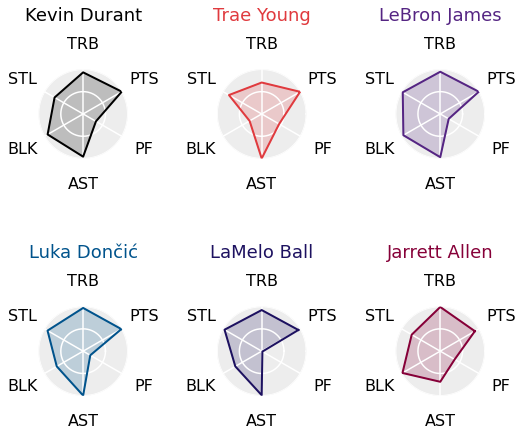

In [96]:
# Create figure
fig = plt.figure(figsize = (8, 8), facecolor = 'white')

# Add subplots
ax1 = fig.add_subplot(231, projection = 'polar', facecolor = '#ededed')
ax2 = fig.add_subplot(232, projection = 'polar', facecolor = '#ededed')
ax3 = fig.add_subplot(233, projection = 'polar', facecolor = '#ededed')
ax4 = fig.add_subplot(234, projection = 'polar', facecolor = '#ededed')
ax5 = fig.add_subplot(235, projection = 'polar', facecolor = '#ededed')
ax6 = fig.add_subplot(236, projection = 'polar', facecolor = '#ededed')

# Adjust space between subplots
plt.subplots_adjust(hspace = 0.2, wspace = 1.0)

# Get data with player
candidate_1_data = get_data(select_data, 'Kevin Durant')
candidate_2_data = get_data(select_data, 'Trae Young')
candidate_3_data = get_data(select_data, 'LeBron James')
candidate_4_data = get_data(select_data, 'Luka Dončić')
candidate_5_data = get_data(select_data, 'LaMelo Ball')
candidate_6_data = get_data(select_data, 'Jarrett Allen')

# Plot data
ax1 = create_radar_chart(ax1, angles, candidate_1_data, team_colors['BRK'])
ax2 = create_radar_chart(ax2, angles, candidate_2_data, team_colors['ATL'])
ax3 = create_radar_chart(ax3, angles, candidate_3_data, team_colors['LAL'])
ax4 = create_radar_chart(ax4, angles, candidate_4_data, team_colors['DAL'])
ax5 = create_radar_chart(ax5, angles, candidate_5_data, team_colors['CHA'])
ax6 = create_radar_chart(ax6, angles, candidate_6_data, team_colors['CLE'])

plt.show()

## **Player Radar Charts Totals**


### **2022 Season**

In [97]:
# NBA season we will be analyzing
year = 2022

# per game url... if we want total, then we can switch "per_game" to "totals"
# I think per game would be better for analysis on what we want
url22 = "https://www.basketball-reference.com/leagues/NBA_{}_totals.html".format(year)
html22 = urlopen(url22)
soup22 = BeautifulSoup(html22)


In [98]:
# get the column headers
# tr is table row
soup22.findAll('tr', limit = 2)
# extract the text we need and put into a list
# th is table header
headers22 = [th.getText() for th in soup22.findAll('tr', limit = 2)[0].findAll('th')]
# exclude the first column (it is ranking, but its jsut a random rankning from the website)
headers22 = headers22[1:]
# show the column headers
# headers22

In [99]:
# avoid the first header row
rows22 = soup22.findAll('tr')[1:]
player_stats22 = [[td.getText() for td in rows22[i].findAll('td')]
            for i in range(len(rows22))]

In [100]:
# put the data into a dataframe
total_player_stats_22 = pd.DataFrame(player_stats22, columns = headers)
total_player_stats_22['Year'] = 2022
total_player_stats_22

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Year
0,Precious Achiuwa,C,22,TOR,43,22,1028,138,325,.425,16,53,.302,122,272,.449,.449,39,70,.557,98,210,308,50,23,27,44,87,331,2022
1,Steven Adams,C,28,MEM,51,50,1334,131,249,.526,0,0,,131,249,.526,.526,75,131,.573,224,261,485,159,48,33,82,90,337,2022
2,Bam Adebayo,C,24,MIA,30,30,985,205,396,.518,0,3,.000,205,393,.522,.518,139,180,.772,80,219,299,106,47,19,89,96,549,2022
3,Santi Aldama,PF,21,MEM,27,0,277,37,97,.381,4,39,.103,33,58,.569,.402,12,20,.600,23,41,64,14,2,7,9,27,90,2022
4,LaMarcus Aldridge,C,36,BRK,36,11,825,207,373,.555,12,38,.316,195,335,.582,.571,58,68,.853,54,148,202,31,13,39,32,63,484,2022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
683,Thaddeus Young,PF,33,SAS,26,1,370,74,128,.578,0,5,.000,74,123,.602,.578,10,22,.455,40,53,93,59,23,7,30,38,158,2022
684,Trae Young,PG,23,ATL,48,48,1662,449,989,.454,138,371,.372,311,618,.503,.524,294,329,.894,30,161,191,446,48,4,198,77,1330,2022
685,Omer Yurtseven,C,23,MIA,39,10,558,101,193,.523,1,7,.143,100,186,.538,.526,32,50,.640,67,167,234,42,15,18,34,68,235,2022
686,Cody Zeller,C,29,POR,27,0,355,51,90,.567,0,4,.000,51,86,.593,.567,38,49,.776,50,75,125,22,8,6,19,56,140,2022


### **Data Setup**

In [101]:
total_select_data = total_player_stats_22[['Player', 'Tm'] + categories]
total_select_data.head()

,Player,Tm,PTS,TRB,STL,BLK,AST,PF
0,Precious Achiuwa,TOR,331,308,23,27,50,87
1,Steven Adams,MEM,337,485,48,33,159,90
2,Bam Adebayo,MIA,549,299,47,19,106,96
3,Santi Aldama,MEM,90,64,2,7,14,27
4,LaMarcus Aldridge,BRK,484,202,13,39,31,63


In [102]:
# Convert data to numerical values
for i in categories:
  total_select_data[i] = pd.to_numeric(total_player_stats_22[i])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [103]:
# Create columns with percentile rank
for i in categories:
  total_select_data[i + '_Rank'] = total_select_data[i].rank(pct = True)

# flip TOV & PF becasue low is good
total_select_data['PF_Rank'] = 1 - total_select_data['PF_Rank']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [104]:
total_select_data

,Player,Tm,PTS,TRB,STL,BLK,AST,PF,PTS_Rank,TRB_Rank,STL_Rank,BLK_Rank,AST_Rank,PF_Rank
0,Precious Achiuwa,TOR,331.0,308.0,23.0,27.0,50.0,87.0,0.669196,0.925645,0.647193,0.871017,0.622155,0.222307
1,Steven Adams,MEM,337.0,485.0,48.0,33.0,159.0,90.0,0.673748,0.983308,0.902124,0.910470,0.885432,0.200303
2,Bam Adebayo,MIA,549.0,299.0,47.0,19.0,106.0,96.0,0.831563,0.918058,0.892261,0.788316,0.811836,0.165402
3,Santi Aldama,MEM,90.0,64.0,2.0,7.0,14.0,27.0,0.405918,0.473445,0.258725,0.522003,0.381639,0.584977
4,LaMarcus Aldridge,BRK,484.0,202.0,13.0,39.0,31.0,63.0,0.790592,0.806525,0.506829,0.933991,0.515175,0.355842
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
683,Thaddeus Young,SAS,158.0,93.0,23.0,7.0,59.0,38.0,0.498483,0.559939,0.647193,0.522003,0.669196,0.524279
684,Trae Young,ATL,1330.0,191.0,48.0,4.0,446.0,77.0,0.998483,0.786039,0.902124,0.421851,0.996965,0.269347
685,Omer Yurtseven,MIA,235.0,234.0,15.0,18.0,42.0,68.0,0.583460,0.867982,0.531108,0.772382,0.569803,0.325493
686,Cody Zeller,POR,140.0,125.0,8.0,6.0,22.0,56.0,0.479514,0.627466,0.417299,0.488619,0.450683,0.407436


### **Graph**

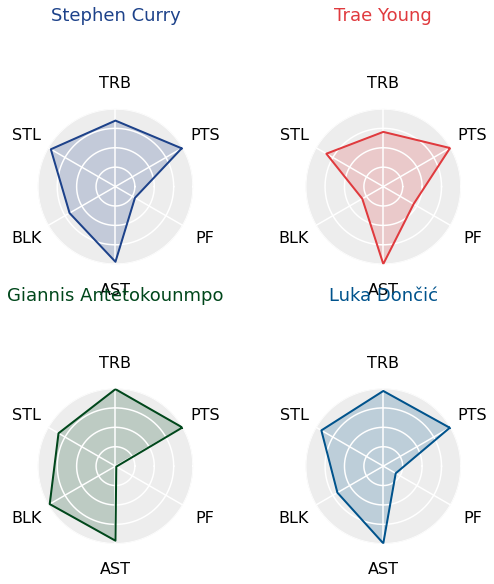

In [105]:
# Create figure
fig = plt.figure(figsize = (8, 8), facecolor = 'white')

# Add subplots
ax1 = fig.add_subplot(221, projection = 'polar', facecolor = '#ededed')
ax2 = fig.add_subplot(222, projection = 'polar', facecolor = '#ededed')
ax3 = fig.add_subplot(223, projection = 'polar', facecolor = '#ededed')
ax4 = fig.add_subplot(224, projection = 'polar', facecolor = '#ededed')

# Adjust space between subplots
plt.subplots_adjust(hspace = 0.8, wspace = 0.5)

# Get data with player
candidate_1_data = get_data(total_select_data, 'Stephen Curry')
candidate_2_data = get_data(total_select_data, 'Trae Young')
candidate_3_data = get_data(total_select_data, 'Giannis Antetokounmpo')
candidate_4_data = get_data(total_select_data, 'Luka Dončić')

# Plot data
ax1 = create_radar_chart(ax1, angles, candidate_1_data, team_colors['GSW'])
ax2 = create_radar_chart(ax2, angles, candidate_2_data, team_colors['ATL'])
ax3 = create_radar_chart(ax3, angles, candidate_3_data, team_colors['MIL'])
ax4 = create_radar_chart(ax4, angles, candidate_4_data, team_colors['DAL'])

plt.show()